In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
!ln -s ~/fastai/fastai fastai

ln: fastai/fastai: File exists


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [3]:
data = ImageDataBunch.from_folder("./data1", 
                                  train=".", 
                                  valid_pct=0.2, 
                                  bs=5,
                                  ds_tfms=get_transforms(), 
                                  size=448, 
                                  num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['over', 'under', 'zero']

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['over', 'under', 'zero'], 3, 48, 12)

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.443295,0.840356,0.416667,00:54
1,1.097045,0.289815,0.083333,00:52
2,0.945332,0.266438,0.083333,00:52
3,0.816836,0.272452,0.166667,00:51


In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


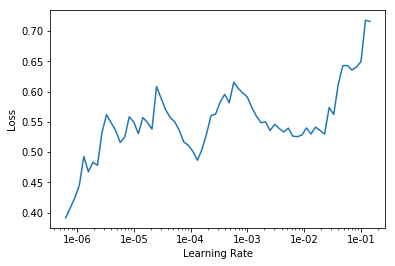

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(4, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.566922,0.282967,0.083333,00:51
1,0.437919,0.245132,0.083333,00:51
2,0.382995,0.258205,0.083333,00:54
3,0.358929,0.243882,0.083333,00:51


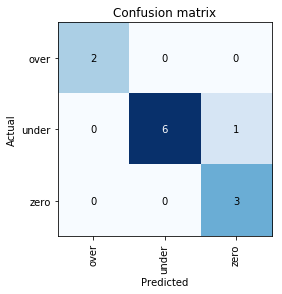

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
learn.export()

In [13]:
path = learn.path
path

PosixPath('data1')

In [21]:
learn = load_learner(path, 'export.pkl')
image = open_image('./data1/zero/10.jpg')
pred_class,pred_idx,outputs = learn.predict(image)
pred_class

Category zero